In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
tests = 12
questions = 14
answers_train = np.array([
    [2, 2, 1],
    [1, 2, 1],
    [2, 3, 2],
    [1, 2, 1],
    [2, 2, 1],
    [3, 3, 1],
    [2, 2, 2],
    [2, 3, 2],
    [1, 1, 1],
    [2, 2, 1],
    [3, 3, 2],
    [2, 2, 2],
    [2, 1, 2],
    [3, 2, 2],
    [2, 4, 2],
    [2, 3, 3],
    [2, 2, 2],
    [3, 3, 3],
    [4, 3, 3],
    [3, 3, 2],
    [4, 3, 4],
    [2, 3, 3],
    [3, 2, 1],
    [2, 2, 2]
])

answers_train_v2 = np.array([
    [2, 2, 1, 2, 2],
    [1, 2, 1, 2, 2],
    [2, 3, 2, 2, 2],
    [1, 2, 1, 2, 1],
    [2, 2, 1, 1, 1],
    [3, 3, 1, 2, 2],
    [2, 2, 2, 2, 3],
    [2, 3, 2, 3, 3],
    [1, 1, 1, 1, 1],
    [2, 2, 1, 2, 1],
    [3, 3, 2, 3, 3],
    [2, 2, 2, 3, 3],
    [2, 1, 2, 2, 1],
    [3, 2, 2, 2, 3],
    [2, 4, 2, 3, 3],
    [2, 3, 3, 2, 2],
    [2, 2, 2, 2, 2],
    [3, 3, 3, 3, 3],
    [4, 3, 3, 4, 3],
    [3, 3, 2, 3, 2],
    [4, 3, 4, 4, 4],
    [2, 3, 3, 3, 3],
    [3, 2, 1, 3, 3],
    [2, 2, 2, 2, 3]
])

trainining_lvl_expected = np.array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1])

course_lvls = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

print(answers_train.shape, course_lvls.shape)

(24, 3) (12,)


In [3]:
print(answers_train.shape, trainining_lvl_expected.shape)

(24, 3) (24,)


In [4]:
tf.random.set_seed(1234)
model_training_lvl = Sequential(
    [
        Dense(8, activation='relu', name="L1"),
        Dense(6, activation='relu', name="L2"),
        Dense(3, activation='softmax', name="Output")
    ]
)
model_training_lvl.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model_training_lvl.fit(
    answers_train_v2,trainining_lvl_expected,
    epochs=200,
    verbose=0
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


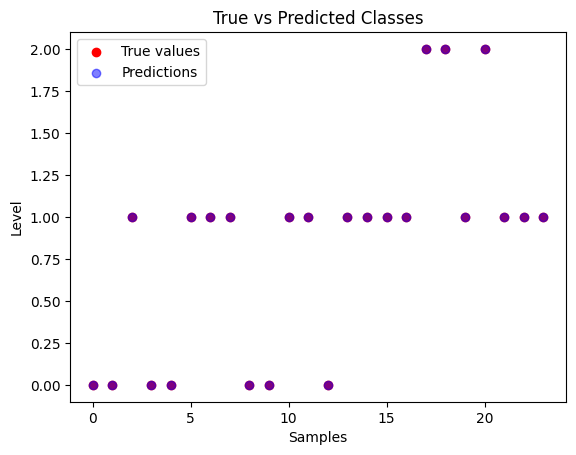

In [5]:
predictions_training_lvl = model_training_lvl.predict(answers_train_v2)
#print(predictions_training_lvl)
predictions_training_lvl = np.argmax(predictions_training_lvl, axis=1)
plt.scatter(range(len(trainining_lvl_expected)), trainining_lvl_expected, label='True values', color='red')
plt.scatter(range(len(predictions_training_lvl)), predictions_training_lvl, label='Predictions', color='blue', alpha=0.5)
plt.xlabel('Samples')
plt.ylabel('Level')
plt.legend()
plt.title('True vs Predicted Classes')
plt.show()

In [6]:
l1 = model_training_lvl.get_layer("L1")
W1,b1 = l1.get_weights()
print('w1', W1, '\nb1', b1)
l2 = model_training_lvl.get_layer("L2")
W2, b2 = l2.get_weights()
print('\nw2', W2, '\nb2', b2)

w1 [[-0.52 -0.3  -0.44  0.36 -0.34 -0.3   0.56 -0.3 ]
 [-0.35  0.88  0.22  0.03  0.16 -0.17 -0.66  0.26]
 [-0.47 -0.15 -0.13  0.15  0.93 -0.33  0.16  0.46]
 [ 0.17  0.12 -0.58 -0.47  0.74  0.15  0.43 -0.58]
 [-0.06 -0.39 -0.53  1.07 -0.24  0.6   0.27 -0.71]] 
b1 [ 0.   -0.46  0.   -0.81 -0.05  0.25 -0.56 -0.13]

w2 [[-0.25  0.03  0.42  0.39  0.11 -0.06]
 [ 0.33 -0.88  0.81  1.13  1.53  0.37]
 [-0.17  0.38 -0.17  0.37  0.46  0.15]
 [-0.31  0.1  -0.75  1.37  0.62 -0.44]
 [-0.49  0.31  0.61  0.17 -0.61 -0.32]
 [ 0.28 -0.56  0.37 -0.08  1.63  0.28]
 [ 0.51  0.52 -0.59  0.22 -0.5   0.26]
 [-0.14  0.1  -0.42  0.69  0.27  0.5 ]] 
b2 [-0.14  0.06  0.98 -0.68  1.28 -0.18]


In [7]:
test_answers_training_level = np.array([[2, 2, 2, 2, 2],
                                        [2, 2, 3, 2, 2],
                                        [3, 3, 3, 3, 4],
                                        [4, 4, 4, 4, 3],
                                        [1, 1, 1, 1, 1],
                                        [2, 3, 2, 3, 2],
                                        [1, 2, 2, 2, 1],
                                        [1, 1, 2, 2, 1],
                                        [2, 1, 1, 2, 1],
                                        [1, 2, 1, 1, 1]
                                       ])
test_predicions_training = model_training_lvl.predict(test_answers_training_level)
test_predicions_training = np.argmax(test_predicions_training, axis=1)
print(test_predicions_training, 'result')
print('[1 1 2 2 0 1 0 0 0 0]', 'mean predictions')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[1 2 1 2 0 1 0 0 0 0] result
[1 1 2 2 0 1 0 0 0 0] mean predictions


In [8]:
def fit_course_lvl(answers, predicted_lvl):
    for j in range(len(answers)):
        for i in range(len(answers[j])):
            if predicted_lvl[j] < course_lvls[i]:
                if answers[j][i] < 0:
                    answers[j][i] *= (course_lvls[i] - predicted_lvl[j] + 1)
                else:
                    answers[j][i] /= (course_lvls[i] - predicted_lvl[j] + 1)
                    
def predict_with_course_lvl(model, answers_raw):
    # Pass the model and the answer results
    answers_no_lvl = np.array([x[3:] for x in answers_raw])
    answers_training_lvl = np.array([x[0:3] for x in answers_raw])
    train_lvl_pred = model_training_lvl.predict(answers_training_lvl)  # predicted knowledge level based on the answers
    train_lvl_pred = np.argmax(train_lvl_pred, axis=1)  # round predicted knowledge level
    final_pred = model.predict(answers_no_lvl)  # predict the course without the first 3 questions
    # print('raw predictions\n', predictions_no_lvl)
    fit_course_lvl(final_pred, train_lvl_pred)  # reduce probabilities for courses with insufficient knowledge level
    return final_pred

def predict_with_course_lvl(model, answers_raw, questions):
    # Pass the model and the answer results
    answers_no_lvl = np.array([x[questions:] for x in answers_raw])
    answers_training_lvl = np.array([x[0:questions] for x in answers_raw])
    train_lvl_pred = model_training_lvl.predict(answers_training_lvl)  # predicted knowledge level based on the answers
    train_lvl_pred = np.argmax(train_lvl_pred, axis=1)  # round predicted knowledge level
    final_pred = model.predict(answers_no_lvl)  # predict the course without the first N questions
    # print('raw predictions\n', predictions_no_lvl)
    fit_course_lvl(final_pred, train_lvl_pred)  # reduce probabilities for courses with insufficient knowledge level
    return final_pred

In [23]:
#model_training_lvl = load_model("training_lvl_model.h5")
# или только веса:
#model_training_lvl.load_weights("training_lvl_weights.h5")